In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


### Визуализируем решающее правило для одного дерева

In [2]:
def get_grid(data):
    """
    data: np.array n_obj x 2 (2 features)
    """
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1 # limits for x
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1 # limits for y
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01)) 
    # returns many points in 2d space that cover square defined by limits

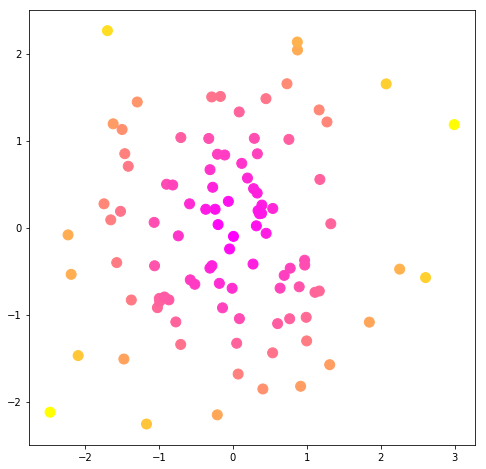

In [9]:
# generating random dataset
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5 # true quadratic dependence
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [7]:
from sklearn.tree import DecisionTreeRegressor

### Задание 1
Построить восстановленную деревом зависимость (гиперпараметры по умолчанию). Значение целевой переменной показывать цветом. Таким образом, получим такой же график, как выше, но еще с цветным фоном, визуализирующим ответы нашего регрессора.

## Везде при построении дерева фиксируйте одинаковый random_state!

In [10]:
# hint 1
a = np.arange(1, 5) # [1, 2, 3, 4]
b = np.arange(7, 11) # [7, 8, 9, 10]
np.c_[a, b]

dt= DecisionTreeRegressor()
dt.fit(data_x,data_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
import numpy as np
data_x
xx, yy =get_grid(data_x)
x_test=np.c_[xx.ravel(), yy.ravel()]
y_test=dt.predict(x_test)
x_test.shape
y_test=y_test.reshape(xx.shape)

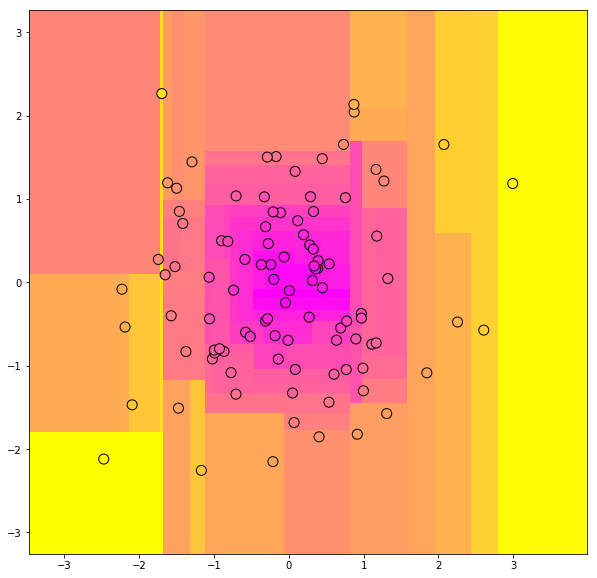

In [68]:
# hint 2
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, y_test, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')
# first arg: x grid, 1-dim np.array, shape=(A,)
# second arg: y grid, 1-dim np.array, shape=(B,)
# third arg: colors, 2-dim np.array, shape=(A-1, B-1)

### Задание 2
Построить такие же рисунки для всех возможных комбинаций max_depth и min_samples_leaf из списка. Удобно располагать изображения в таблице 3 x 3, это можно сделать с помощью plt.subplot(3, 3, i), i - номер графика (начиная с единицы)

In [75]:
max_depth_options = [2, 4, None]
min_samples_leaf_options = [15, 5, 1]

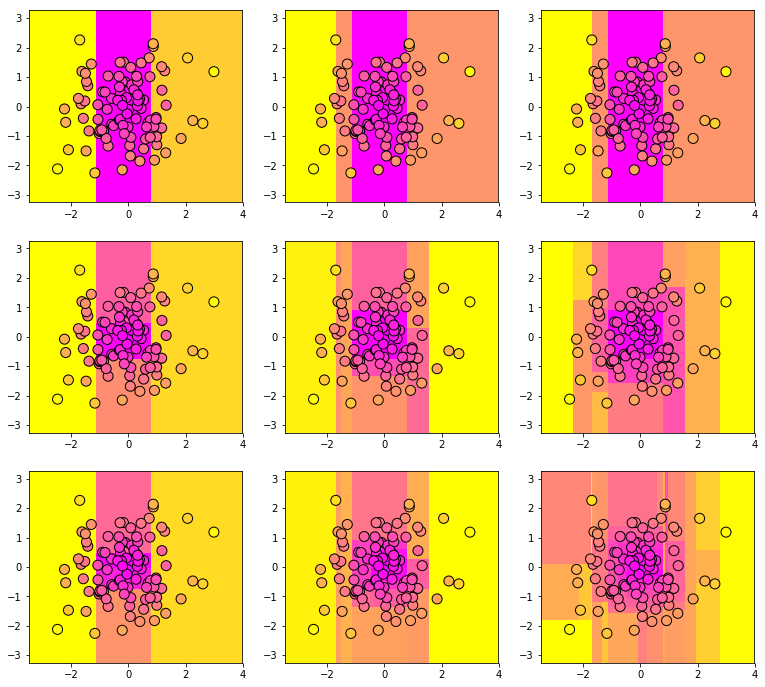

In [76]:
f, ax = plt.subplots(3, 3, figsize=(13, 12))

xx, yy =get_grid(data_x)

def func (md, msl):
    dt= DecisionTreeRegressor(max_depth=md, min_samples_leaf=msl)
    dt.fit(data_x,data_y)
    x_test=np.c_[xx.ravel(), yy.ravel()]
    y_test=dt.predict(x_test)
    y_test=y_test.reshape(xx.shape)
    return y_test

for i in range(3):
    for j in range(3):
        y_test=func (max_depth_options[i], min_samples_leaf_options[j])
        ax[i,j].pcolormesh(xx, yy, y_test, cmap='spring')
        ax[i,j].scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

Вопросы:
* Охарактеризуйте, как меняется поверхность при увеличении max_depth и min_samples_leaf. Соответствует ли это здравому смыслу? :)

### Задание 3
Построить такие же рисунки для трех случайных подвыборок data_x размера size.

In [79]:
size = int(0.9*data_x.shape[0])
from sklearn.model_selection import train_test_split

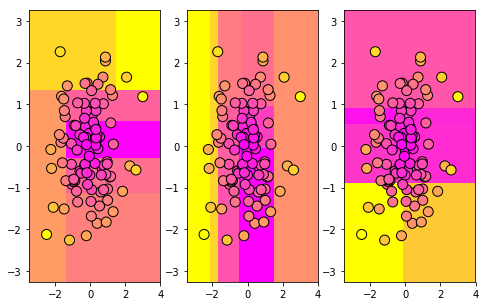

In [113]:
f, ax = plt.subplots(1, 3, figsize=(8, 5))

xx, yy = get_grid(data_x)

def func (rnd):
    X_train, X_test_new, y_train, y_test_new = train_test_split(data_x, data_y, test_size=0.1, random_state=rnd)
    dt= DecisionTreeRegressor()
    dt.fit(X_test_new,y_test_new)
    x_test=np.c_[xx.ravel(), yy.ravel()]
    y_test=dt.predict(x_test)
    y_test=y_test.reshape(xx.shape)
    return y_test

li = [17, 243, 392]
for c, value in enumerate(li):
    y_test=func(value)
    ax[c].pcolormesh(xx, yy, y_test, cmap='spring')
    ax[c].scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

Вопросы:
* Сильно ли меняется поверхность?

## Задание 4
Рассмотрим датасет Boston House Prices dataset. С помощью GridSearchCV найдите оптимальные гиперпараметры среди перечисленных в param_grid. Постройте три графика зависимости качества решения задачи от max_depth (отдельные графики соответствуют различным значениям max_features). Критерий качества - $R^2$

In [ ]:
param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]}

In [24]:
from sklearn.datasets import load_boston

In [25]:
data = load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [26]:
X = data.data
y = data.target

In [28]:
print(X. shape)

(506, 13)


Вопросы:
* Каков вид зависимости качества от max_depth и max_features? Насколько качество со гиперпараметрами, подобранными по кросс-валидации, лучше, чем с гиперпараметрами по умолчанию?